In [1]:
# Load the dataset
import pandas as pd
df = pd.read_csv('C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\PCA\\wine.csv')

In [2]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.shape  # (178, 14)  

(178, 14)

In [5]:
# Exploratory Data Analysis
# Define the columns to check for outliers (excluding 'Type' column)
columns_to_check = df.columns[1:]
columns_to_check

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [7]:
# Remove outliers
data_no_outliers = remove_outliers_iqr(df, columns_to_check)
data_no_outliers  #[161 rows x 14 columns]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
# Reset the index
data_no_outliers = data_no_outliers.reset_index(drop=True)

In [9]:
# Check the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", data_no_outliers.shape)  # (161, 14)

Shape of the dataset after removing outliers: (161, 14)


In [10]:
df = data_no_outliers
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
157,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
158,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
159,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
# Transformation
# Extract the features (excluding the 'Type' column)
df_cont = df.drop('Type', axis=1)
df_cont

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
157,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
158,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
159,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
SS_X = SS.fit_transform(df_cont)

In [14]:
X = pd.DataFrame(SS_X)
X.columns = list(df_cont)

In [15]:
# Principal Component Analysis
# Perform PCA to get the first three principal components
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X)

In [17]:
principal_components = pd.DataFrame(principal_components)
principal_components    # [161 rows x 3 columns]

,0,1,2
0,-3.503528,-1.609446,0.039412
1,-2.342642,0.331164,-1.978331
2,-2.661349,-0.936183,1.126533
3,-3.925301,-2.710827,-0.146296
4,-1.032831,-1.074396,2.445841
...,...,...,...
156,2.405826,-2.242187,-0.990173
157,2.642860,-1.932660,0.310455
158,2.656031,-3.179693,-1.026259
159,2.354087,-2.646939,-0.606445


In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.38552403, 0.20659478, 0.09511346])

In [19]:
# Hierarchical clustering
# Printing the Hierarchical Linkage Matrix:
from scipy.cluster.hierarchy import linkage

In [20]:
linkage_matrix = linkage(principal_components, method='ward')
print("Hierarchical Linkage Matrix:")
print(linkage_matrix)

Hierarchical Linkage Matrix:
[[3.20000000e+01 3.40000000e+01 6.09770633e-02 2.00000000e+00]
 [1.06000000e+02 1.16000000e+02 1.35606280e-01 2.00000000e+00]
 [1.23000000e+02 1.25000000e+02 1.88872787e-01 2.00000000e+00]
 [1.19000000e+02 1.30000000e+02 1.99402014e-01 2.00000000e+00]
 [1.40000000e+01 5.10000000e+01 2.17740124e-01 2.00000000e+00]
 [1.90000000e+01 4.00000000e+01 2.23996488e-01 2.00000000e+00]
 [1.80000000e+01 4.60000000e+01 2.33984831e-01 2.00000000e+00]
 [9.90000000e+01 1.10000000e+02 2.58397001e-01 2.00000000e+00]
 [4.70000000e+01 5.40000000e+01 2.94932179e-01 2.00000000e+00]
 [1.32000000e+02 1.47000000e+02 3.04558485e-01 2.00000000e+00]
 [0.00000000e+00 5.60000000e+01 3.07639062e-01 2.00000000e+00]
 [7.00000000e+01 9.40000000e+01 3.14544256e-01 2.00000000e+00]
 [7.00000000e+00 1.65000000e+02 3.15156225e-01 3.00000000e+00]
 [8.70000000e+01 8.80000000e+01 3.20460070e-01 2.00000000e+00]
 [9.00000000e+00 4.50000000e+01 3.20820458e-01 2.00000000e+00]
 [1.37000000e+02 1.5000000

In [21]:
# Plotting a Dendrogram (Visual Representation):
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [22]:
linkage_matrix = linkage(principal_components, method='ward')

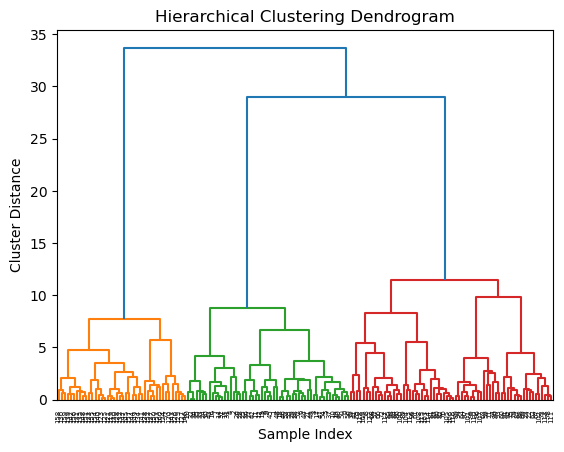

In [23]:
# Create a dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [24]:
""" in our code , we are using the hierarchial(aggloromative) clustering to group our data points.
however, the no of clusters we specified is not directly impact the dendogram as the dendogram shows the hierarchial clusterng of the data
and does not directly display the specified no of clusters.to visualize with the correct number of clusters ,we should adjust our linkage method to "single" accordingly """


# Create and fit an Agglomerative Clustering model
# Forming a group using clustering
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3  # You can adjust the number of clusters as needed

In [25]:
agglomerative = AgglomerativeClustering(n_clusters=n_clusters,affinity='euclidean',linkage='complete')
agglomerative_labels = agglomerative.fit_predict(X)

In [26]:
Y_new = pd.DataFrame(agglomerative_labels)
Y_new[0].value_counts()

0    70
2    58
1    33
Name: 0, dtype: int64

In [27]:
# Visualize the clustered data
# Visualize the first and second principal components
import seaborn as sns
import matplotlib.pyplot as plt

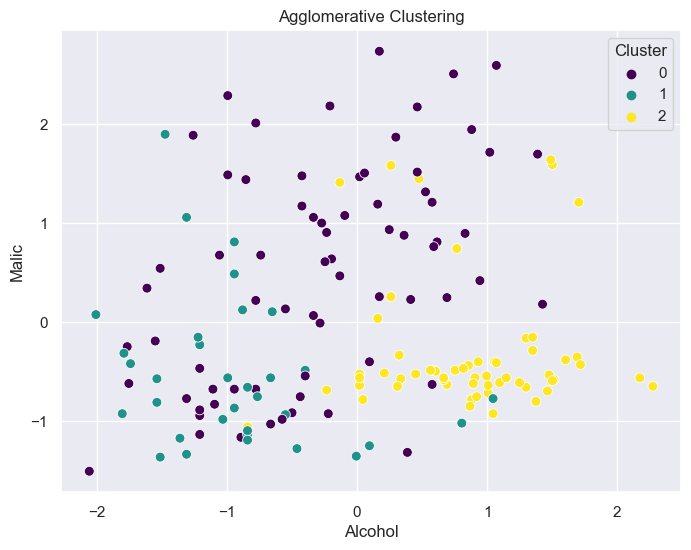

In [28]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=agglomerative_labels, palette='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title='Cluster')
plt.show()

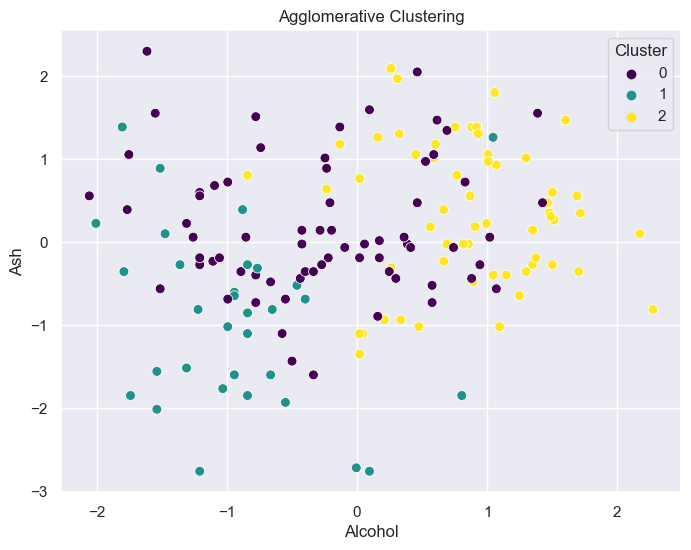

In [29]:
# Visualize the first and third principal components
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=agglomerative_labels, palette='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[2])
plt.legend(title='Cluster')
plt.show()

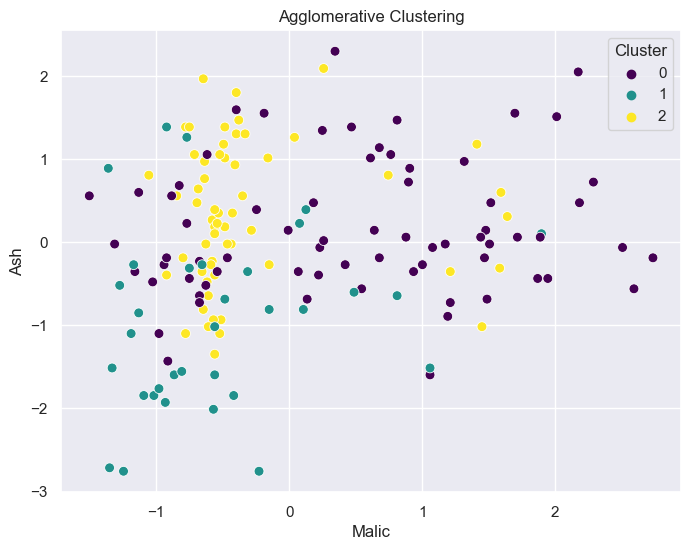

In [30]:
# Visualize the second and third principal components
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=agglomerative_labels, palette='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel(X.columns[1])
plt.ylabel(X.columns[2])
plt.legend(title='Cluster')
plt.show()

In [31]:
# K-means clustering with the elbow method
from sklearn.cluster import KMeans
kresults = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    kresults.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

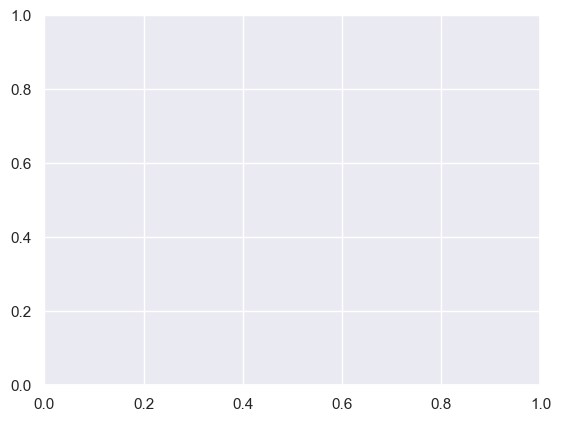

In [32]:
# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(range(1, 11),kresults, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
"""according to the elbow method we can get clarity on upto  which k value should be choosen"""
"""  at a certain stage ,we will able to see minimal drop of inertia values from major drop of inertial value.those minimal drop 
inertial k-stages can be neglected or ignored"""

""" here in this case we have a sequence of minimal drop of inertia values from k=5 onwards so we can neglect them and we will choose
the k value as 3 in this case"""

""" we have obtained the same clusters as the original data so this is the optimal solution  """

' we have obtained the same clusters as the original data so this is the optimal solution  '

In [34]:
# From the elbow curve, determine the optimal number of clusters
optimal_clusters = 3  # Determine based on the elbow curve

In [35]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)

In [36]:
kmeans_clusters = kmeans.fit_predict(principal_components)
kmeans_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [37]:
# Compare the obtained clusters to the original 'Type' column
original_clusters = df['Type']
original_clusters

0      1
1      1
2      1
3      1
4      1
      ..
156    3
157    3
158    3
159    3
160    3
Name: Type, Length: 161, dtype: int64

In [38]:
# Print the results
print("Hierarchical Clustering Labels:")
print(linkage(principal_components, method='ward')[:,2])
print("Agglomerative Clustering Labels:")
print(agglomerative_labels)
print("\nK-Means Clustering Labels:")
print(kmeans_clusters)
print("\nOriginal 'Type' Labels:")
print(original_clusters)

Hierarchical Clustering Labels:
[ 0.06097706  0.13560628  0.18887279  0.19940201  0.21774012  0.22399649
  0.23398483  0.258397    0.29493218  0.30455848  0.30763906  0.31454426
  0.31515623  0.32046007  0.32082046  0.32125394  0.32410154  0.32680228
  0.32770765  0.34043553  0.34449047  0.34589909  0.34616653  0.35091851
  0.37049188  0.37431637  0.38934174  0.42583849  0.43188101  0.44094631
  0.44650476  0.4531237   0.47854557  0.4797656   0.48550187  0.49414502
  0.49801961  0.50424963  0.51345542  0.52229172  0.53430477  0.55521897
  0.56131141  0.57581656  0.57911492  0.5803634   0.59587532  0.60597847
  0.6108228   0.62317556  0.6238757   0.62443956  0.65694353  0.67101575
  0.6747628   0.67916315  0.68644109  0.69527064  0.70534299  0.70556938
  0.70847233  0.72968326  0.73554097  0.73717985  0.74274982  0.74324141
  0.74918989  0.74942966  0.75422999  0.7605954   0.76139554  0.76374983
  0.76963088  0.78812503  0.79196536  0.81611889  0.8303485   0.83986262
  0.84034599  0.841

In [39]:
# the Adjusted Rand Index to measure the similarity between the K-Means clusters and the original 'Type' labels. A higher ARI indicates a better clustering performance
# Adjusted Rand Index (ARI)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(original_clusters, kmeans_clusters)

In [40]:
print(f'Adjusted Rand Index: {ari}')   # Adjusted Rand Index: 0.9471506150594584
# This will provide you with a quantitative measure of the similarity between the obtained K-Means clusters and the original 'Type' labels. The closer the ARI is to 1, the better the clustering results align with the original classes.

Adjusted Rand Index: 0.9471506150594584
